# Analyzing questionnaires in R

In this demonstration, we are going to cover some of the basics for analyzing questionnaires (i.e., a collection of items representing a construct) using R. We will use this setup and code for analyzing our own psychometric assessments (questionnaires) next week.

What we will be covering:

- Loading and preparing our data

- Compute item-level descriptive statistics

- Visualize item response distributions

- Create a composite (i.e., total) score

- Interpret patterns in our data (i.e., items)

## Loading packages

We will primarily use two sets of packages.

- `tidyverse` is a suite of packages and we will use functions to clean/tidy our data and to manipulate our data.

- `psych` is the primary R package for psychological/psychometric analyses. It is widely used and is maintained by a foremost expert in psychometrics.

- `corrplot` is an optional package just to visualize a bunch of correlations at once. I generally do not recommend visualizing correlations in this manner because it gives too rough of an estimate and is too hard to identify specific correlation values. This is just illustrative.

In [30]:
## Install the psych package, it is not native to Google Colab
install.packages("psych")

## Install corrplot package
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
## Load the tidyverse suite of packages
library(tidyverse)

## Load the psych package
library(psych)

## Load the corrplot package
library(corrplot)

corrplot 0.95 loaded



## Understanding our data

Today, we are analyzing items related to perceived control in a workplace context.

**Perceived Control at Work**

Definition: Perceived control at work refers to the extent to which individuals believe they can influence outcomes in their job through their own actions, decisions, and efforts. This construct draws from theories of locus of control (Rotter, 1966), work self-efficacy (Bandura, 1997), and job autonomy (Hackman & Oldham, 1976).

**Scale items:**

1. (CTRL1)	I have control over how I accomplish my work tasks.
2. (CTRL2)	The outcomes of my work largely depend on my own efforts.
3. (CTRL3)	I can usually solve problems at work if I try hard enough.
4. (CTRL4)	When something goes wrong at work, I know how to fix it.
5. (CTRL5)	I can influence the success of the projects I work on.
6. (CTRL6)	I have the ability to overcome setbacks at work.
7. (CTRL7)	My job performance is mostly under my control.
8. (CTRL8)	I know what to change when I want to improve my work results.
9. (CTRL9)	I feel capable of handling unexpected challenges at work.
10. (CTRL10)	I can adjust my strategies at work when things aren’t going well.

**Response format:**

All items are scored using the same response scale format.

1. Strongly disagree
2. Disagree
3. Somewhat disagree
4. Neither agree/disagree
5. Somewhat agree
6. Agree
7. Strongly agree

## Load and inspect our data

Notice that our scale has more than just the 10 items we are examining. This will be roughly how our class data is formatted. In the next step for data cleaning, we will use the column identifiers to select the specific items we need. That's why we are using a group name identifier, so that groups can easily find their specific items and responses.

In [4]:
## Load data
## Set the URL to Casey's GitHub page where the dataset is located
FileURL <- "https://raw.githubusercontent.com/CaseyGio/Psyc6263/refs/heads/main/Datasets/Anx%20and%20ctrl%20data.csv"

## Read the csv file from GitHub and create a new object
Ctrl <- read_csv(url(FileURL))

## Check out the dataset
head(Ctrl, n = 10)

Rows: 100 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ResponseID
dbl (20): ANX1, ANX2, ANX3, ANX4, ANX5, ANX6, ANX7, ANX8, ANX9, ANX10, CTRL1...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ResponseID,ANX1,ANX2,ANX3,ANX4,ANX5,ANX6,ANX7,ANX8,ANX9,⋯,CTRL1,CTRL2,CTRL3,CTRL4,CTRL5,CTRL6,CTRL7,CTRL8,CTRL9,CTRL10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R001,4,4,4,4,5,6,5,3,3,⋯,3,4,4,6,5,5,3,2,5,5
R002,2,4,3,4,5,4,4,3,4,⋯,3,3,5,4,4,5,4,3,5,4
R003,3,5,4,5,4,3,4,4,5,⋯,4,4,2,5,4,3,4,4,4,4
R004,6,2,4,5,5,5,5,4,2,⋯,5,4,3,5,5,5,4,5,4,4
R005,1,5,5,3,5,4,4,5,4,⋯,5,3,3,4,5,3,1,5,6,3
R006,3,2,5,5,2,5,4,5,4,⋯,4,4,3,5,6,5,3,3,5,5
R007,5,4,4,5,5,5,4,5,4,⋯,3,3,3,3,4,4,3,2,3,3
R008,3,6,3,4,4,5,5,3,3,⋯,4,3,4,5,6,4,5,4,6,5
R009,3,3,4,4,4,2,5,4,3,⋯,5,5,5,5,4,2,3,3,4,3


## Data cleaning

Our data is mostly cleaned. However, we have two steps to accomplish.

1. To `select()` the correct columns that represent our Control Beliefs scale items. Conveniently, we can use the `starts_with()` function to only select items with the CTRL column name identifier.  

2. To create a new variable that represents our total score. The most often approaches are to sum or average the scores within a person to create their total score. The sum works if everybody answers all questions. If not, the average will give comparable scores based on the responded items.

The second step uses some nested functions. Essentially, `mutate()` will create/change a variable. Here, we are creating a variable named "CTRLTotal". This variable is created by taking the `rowMeans` of all columns identified by the "CTRL" prefix. The `na.rm = TRUE` portion is just saying that if any person skipped a question and instead has a value of NA, to ignore that question and create the average after ignoring the NAs.

In [19]:
## Select the items with "CTRL" as the column name prefix
CtrlClean <-
  Ctrl %>%
  select(starts_with("CTRL")) %>%
  mutate(CTRLTotal = rowMeans(select(., starts_with("CTRL")), na.rm = TRUE))

## View our data to see if we were successful
head(CtrlClean, n = 10)

CTRL1,CTRL2,CTRL3,CTRL4,CTRL5,CTRL6,CTRL7,CTRL8,CTRL9,CTRL10,CTRLTotal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,4,4,6,5,5,3,2,5,5,4.2
3,3,5,4,4,5,4,3,5,4,4.0
4,4,2,5,4,3,4,4,4,4,3.8
5,4,3,5,5,5,4,5,4,4,4.4
5,3,3,4,5,3,1,5,6,3,3.8
4,4,3,5,6,5,3,3,5,5,4.3
3,3,3,3,4,4,3,2,3,3,3.1
4,3,4,5,6,4,5,4,6,5,4.6
5,5,5,5,4,2,3,3,4,3,3.9


## Item level descriptive statistics

We shall compute some of the usual descriptive statistics as well as some new ones to help us describe our data. Mainly, we will focus on the mean, sd, and skew. Together, these 3 (kurtosis, too) help us quantitatively describe our distributions.

- n: This column represents the number of valid responses, the sample size (i.e., number of participants/subjects in our data).

- mean: The average/mean score of the 1 to 7 point scale.

- sd: The standard deviation of scores.

- median: The 50th percentile of scores, the median.

- trimmed: A version of the mean where we "trim" or remove the upper and lower portions of scores. It represents a more robust version of the mean in case we have large outliers (remember the mean is highly influenced by outliers).

- mad: The median absolute deviation, which is the same thing as the standard deviation except that it is calculated using the median instead of the mean. This is often used when we have non-normally distributed data and paired with the median (like SD is paired with the mean).

- min: The minimum score that people selected on the 1- to 7-point scale.

- max: The maximum score that people selected on the 1- to 7-point scale.

- range: The difference between the max and min. One measure of variability.

- skew: Quantifies the asymmetry of a distribution. Values of 0 represent perfectly symmetrical data (e.g., a normal distribution). Positive skew values represent positive skew (i.e., the right tail of the distrubtion is longer, scores are clustered at the low end). Negative skew values represent negative skew (i.e., the left tail of the distribution is longer, scores are clustered at the high end). Values between roughly -1 and +1 are usually "acceptable".

- kurtosis: Quantifies the peakedness (high & narrow peaked distribution) vs tailedness (low & wide distribution) of the distribution. Values of 0 represent normal peakedness, like a normal distribution. High values (negative or positive) represent response distributions that are not normally distributed and may represent range restriction or other distributional issues.

In [20]:
## Compute descriptive statistics on each item/variable
describe(CtrlClean) %>%
  round(3) ## Round digits to 3 decimals for easier interpretation

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CTRL1,1,100,3.750,1.019,4.00,3.800,1.483,1.0,6.0,5.0,-0.344,0.098,0.102
CTRL2,2,100,3.720,0.944,4.00,3.712,1.483,1.0,6.0,5.0,0.074,0.038,0.094
CTRL3,3,100,3.950,0.925,4.00,3.975,1.483,2.0,6.0,4.0,-0.130,-0.084,0.093
CTRL4,4,100,4.480,0.785,5.00,4.525,1.483,3.0,7.0,4.0,0.190,0.820,0.078
CTRL5,5,100,4.450,0.914,4.00,4.450,1.483,2.0,6.0,4.0,0.028,-0.503,0.091
CTRL6,6,100,4.050,1.058,4.00,4.100,1.483,1.0,6.0,5.0,-0.352,-0.238,0.106
CTRL7,7,100,3.890,1.145,4.00,3.938,1.483,1.0,7.0,6.0,-0.187,0.149,0.114
CTRL8,8,100,3.710,0.957,4.00,3.750,1.483,1.0,6.0,5.0,-0.157,-0.126,0.096
CTRL9,9,100,4.400,0.910,4.00,4.412,1.483,2.0,6.0,4.0,-0.302,-0.300,0.091


## Interpretation

- Mean: Most responses are in the middle of the scale (e.g., ~3 to 4 out of 7). Values around 1/2 or 6/7 might indicate floor or ceiling (respectively) effects.

- SD: Most responses have an average deviation from the mean of about 1. This indicates some degree of variability. Remember that variability is necessary. If everybody selects the same answer, we cannot differentiate people based on that item.

- Skew: Most items have a skewness near 0 with a few negatively skewed (i.e., scores clustering at higher levels, few responses at low levels) but there aren't *major* skewness issues.

## Visualizing each item's distribution

This part is tricky so we will do a couple of steps to try clarifying what is going on.

1. We need to reshape the data from *wide* (i.e., participants on the rows and item responses on the columns) to *long* format (i.e., every single item as 1 column and a response to that item as 1 column). In other words, given our 100 participants, we will go from a 100 by 11 (10 items + total score) matrix to a 1,100 by 2 matrix.

2. We will plot the distribution of each item on a separate graphic.



In [21]:
## Reshape from wide to long format
CtrlLong <-
  CtrlClean %>% ## Take our wide format items
  pivot_longer(everything(),  ## Reshape to long format
               names_to = "item",
               values_to = "response")

## View the data to see what it looks like
head(CtrlLong, n = 25)

item,response
<chr>,<dbl>
CTRL1,3.0
CTRL2,4.0
CTRL3,4.0
CTRL4,6.0
CTRL5,5.0
CTRL6,5.0
CTRL7,3.0
CTRL8,2.0
CTRL9,5.0


There are 100 rows named CTRL1, one for each person's responses. We have essentially stacked all of this together. That way, we can create separate graphs for each item. This is just a quirk about how `ggplot2` functions.

Next, we introduce a new element in ggplot, the `facet_wrap()` function. It basically says that we create a separate graph (with all the same properties) whenever we encounter a different category level under the "item" column. As there are 10 different items (e.g., CTRL1, CTRL2), we will have 10 separate histograms.

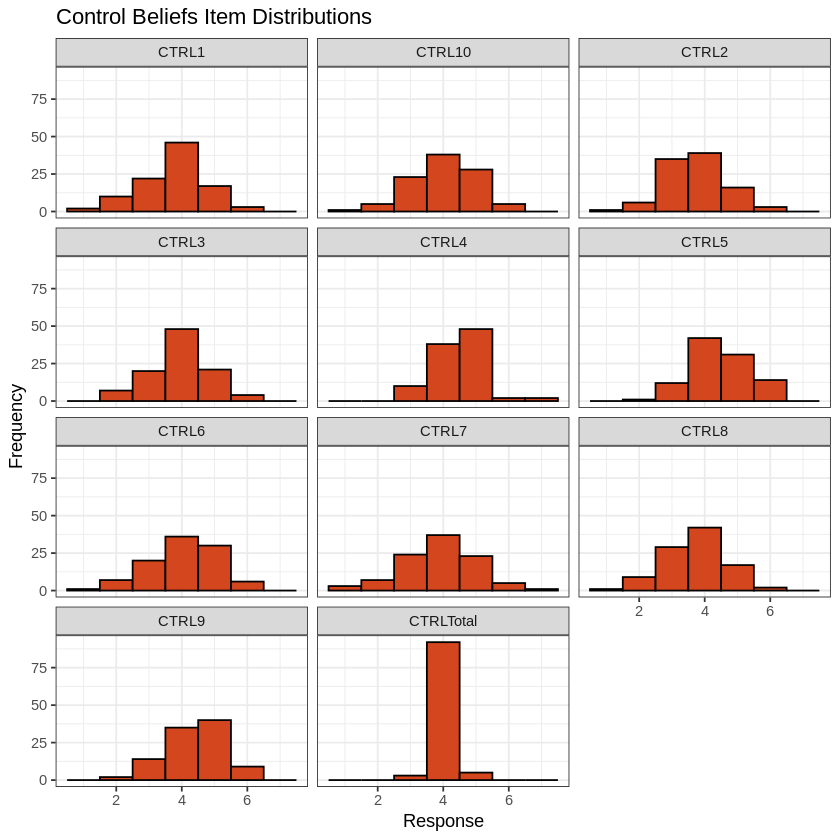

In [23]:
## Create a plot to display item distributions
ggplot(CtrlLong, aes(x = response)) +
  geom_histogram(binwidth = 1, fill = "#d3461e", color = "black") + ## AUM Colors
  facet_wrap(~ item, ncol = 3) + ## New graph for each item, 3 columns of graphs
  labs(title = "Control Beliefs Item Distributions", x = "Response", y = "Frequency") +
  theme_bw()

### Interpretation

Overall, these items appear to be normally distributed, lack floor and/or ceiling effects, and have some variability in their responses. The most extreme response options (e.g., 1/2 and 6/7) are not often endorsed and most people respond near the middle of the distribution, which is ideal.

Item 4 had a high mean and low SD (and high kurtosis) and we can see that it is a little "funky" in its shape.

Items 10 and 7 look really nice. Not too peaked (high kurtosis), nice and even spread to the data (lacks skewness, sufficient variability/SD).



## Correlations between items

We can examine a correlation matrix to see how items relate to each other. This is useful to help us identify problematic items in another sense. Namely, looking at items *individually* fails to let us see if there are either redundant or irrelevant items. Item descriptive statistics focus on 1 item at a time rather than whether the items even relate to each other at all (which is superficial evidence that they relate to a similar construct).

Each row & column pairing represents the correlation between those two items. A variable will always correlation 1.0 with itself so that's why we always see 1.0 on the diagonal.

We are looking for two things that allude to problematic items:

- Correlations *too* high. Items correlating > 0.70 are redundant and asking the same thing. This will artificially inflate our reliability but at costs. Either lacking content validity coverage or just asking too many items when fewer are needed.

- Correlations *too* low. Items unrelated or even negatively related (besides reverse-coded items that were not reverse scored) also indicate a problem. That being said, this is mostly problematic for item-total score correlations. Not every item must correlate with every other item.

In [34]:
## Create correlation matrix
CtrlCorr <- ## Save as an object for the next code chunk
  cor(CtrlClean)

## Display correlation matrix
CtrlCorr %>%
  round(2) ## Round to 2 digits for easier interpretation

,CTRL1,CTRL2,CTRL3,CTRL4,CTRL5,CTRL6,CTRL7,CTRL8,CTRL9,CTRL10,CTRLTotal
CTRL1,1.00,0.02,0.18,0.03,0.09,-0.25,-0.05,-0.04,0.08,-0.05,0.33
CTRL2,0.02,1.00,0.01,0.10,-0.03,-0.08,0.03,-0.09,-0.07,-0.05,0.27
CTRL3,0.18,0.01,1.00,-0.01,0.19,-0.03,0.01,-0.24,-0.18,0.00,0.30
CTRL4,0.03,0.10,-0.01,1.00,-0.08,0.02,-0.18,0.09,-0.02,0.01,0.25
CTRL5,0.09,-0.03,0.19,-0.08,1.00,0.02,0.12,-0.10,-0.06,0.08,0.40
CTRL6,-0.25,-0.08,-0.03,0.02,0.02,1.00,0.00,-0.05,-0.07,-0.05,0.20
CTRL7,-0.05,0.03,0.01,-0.18,0.12,0.00,1.00,-0.11,-0.02,0.16,0.39
CTRL8,-0.04,-0.09,-0.24,0.09,-0.10,-0.05,-0.11,1.00,0.22,-0.01,0.20
CTRL9,0.08,-0.07,-0.18,-0.02,-0.06,-0.07,-0.02,0.22,1.00,0.01,0.28
CTRL10,-0.05,-0.05,0.00,0.01,0.08,-0.05,0.16,-0.01,0.01,1.00,0.38


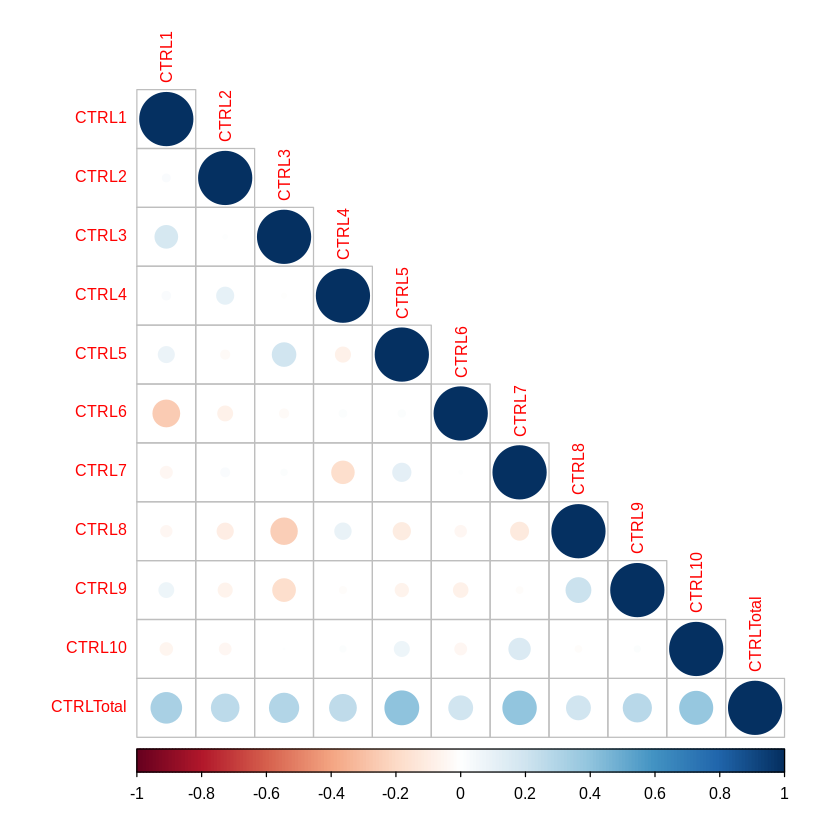

In [33]:
## Visualize correlation values
corrplot(CtrlCorr,
         method = "circle", ## Display circles
         type = "lower", ## Ignore upper triangle correlations
         tl.cex = 0.8)